In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
recipe_path = "https://raw.githubusercontent.com/lorenzomad/foodMapping/main/data/RAW_recipes.csv"

recipes_df = pd.read_csv(recipe_path, index_col="id")

In [3]:
recipes_df.head()

,name,ingredients,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
id,,,,,,,,,
137739,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
31490,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
112140,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
59389,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
44061,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's create the starting dataframe with only the relevant characteristics

In [5]:
recipes_df = recipes_df[["name", "ingredients"]].sort_values("id")
recipes_df.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"['blueberries', 'granulated sugar', 'vanilla y..."
39,biryani,"['saffron', 'milk', 'hot green chili peppers',..."
40,best lemonade,"['sugar', 'lemons, rind of', 'fresh water', 'f..."
41,carina s tofu vegetable kebabs,"['extra firm tofu', 'eggplant', 'zucchini', 'r..."
43,best blackbottom pie,"['graham cracker crumbs', 'sugar', 'butter', '..."


Now we want to work on the df to extract all the ingredient names
1) convert the items to lists

In [6]:
recipes_df["ingredients"] = recipes_df["ingredients"].apply(eval)
recipes_df.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"[blueberries, granulated sugar, vanilla yogurt..."
39,biryani,"[saffron, milk, hot green chili peppers, onion..."
40,best lemonade,"[sugar, lemons, rind of, fresh water, fresh le..."
41,carina s tofu vegetable kebabs,"[extra firm tofu, eggplant, zucchini, red pepp..."
43,best blackbottom pie,"[graham cracker crumbs, sugar, butter, cornsta..."


Now we can count how many elements are there for each ingredient and apply other actions

In [7]:
recipes_df["ingredients"].explode().value_counts()

salt                               85746
butter                             54975
sugar                              44535
onion                              39065
water                              34914
                                   ...  
spanish rice and vermicelli mix        1
fruit bits                             1
passover wine                          1
smoked trout fillet                    1
gummy ring                             1
Name: ingredients, Length: 14942, dtype: int64

Let's try to plot the top 20 used ingredients now

Text(0.5, 1.0, 'Ingredients used in recipes')

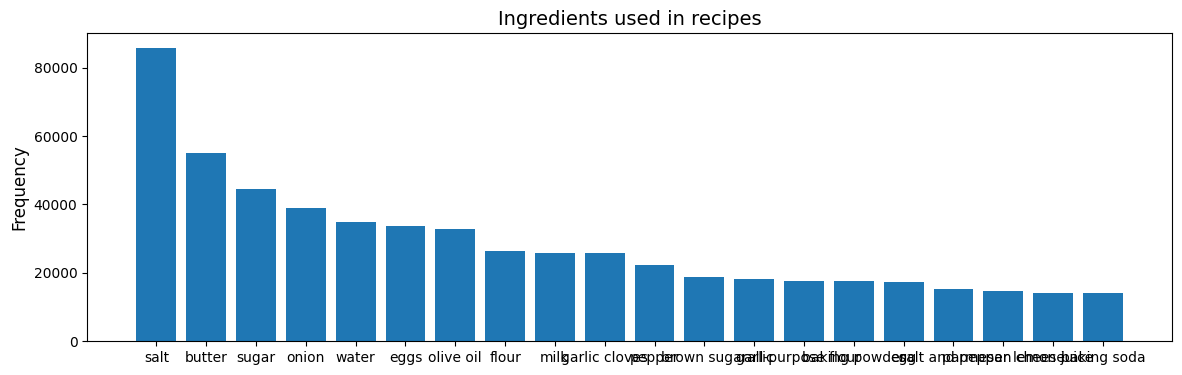

In [11]:
# Get unique items & counts
all_ingredients = recipes_df["ingredients"].explode().value_counts().index.tolist()
ingredient_counts = recipes_df["ingredients"].explode().value_counts().values
# Create plot
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(all_ingredients[:20], ingredient_counts[:20])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Ingredients used in recipes", size = 14)

There are a lot of ingredients, let's limit ourselves to the ones that appear in at least 10 recipes


In [15]:
ingredients = {"ingredient": all_ingredients, "count" : ingredient_counts }

ingredients_df = pd.DataFrame(ingredients)
ingredients_df

,ingredient,count
0,salt,85746
1,butter,54975
2,sugar,44535
3,onion,39065
4,water,34914
...,...,...
14937,spanish rice and vermicelli mix,1
14938,fruit bits,1
14939,passover wine,1
14940,smoked trout fillet,1


In [21]:
ingredients_df.shape

(14942, 2)

In [20]:
ingredients_short = ingredients_df[ingredients_df["count"] > 10]
ingredients_short.shape

(5741, 2)

this reduced the number of items to 1 third

to get much further in terms of our analysis my idea is to explode in our initial dataframe the ingredients column into *n* columns where n is the number of ingredients and the corresponding value will be 1 if the recipe has the specific ingredient

In [34]:
import time

def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    start_time = time.perf_counter()

    # Loop through all the tags
    for i, item in enumerate(unique_items):
      if i % 50 == 0 :
        completion_perc = i / unique_items.size * 100
        print(f"Completion: { completion_perc}%")

        elapsed_time = time.perf_counter() - start_time
        time_left = elapsed_time / (completion_perc if completion_perc != 0 else 0.0000001) * (100 - completion_perc)
        print(f"Time elapsed: {elapsed_time}. expected to end in {time_left} \n")



      # Apply boolean mask
      bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

recipes_bool = boolean_df(
  item_lists = recipes_df["ingredients"],
  unique_items = ingredients_short["ingredient"]
)

Completion: 0.0%
Time elapsed: 0.00299410000025091. expected to end in 2994100.00025091 

Completion: 0.870928409684724%
Time elapsed: 5.538080762999925. expected to end in 630.3443524446515 

Completion: 1.741856819369448%
Time elapsed: 9.778781932000129. expected to end in 551.6210887841273 

Completion: 2.6127852290541718%
Time elapsed: 14.39255884100021. expected to end in 536.4586432002144 

Completion: 3.483713638738896%
Time elapsed: 19.540249556999697. expected to end in 541.3626139766766 

Completion: 4.35464204842362%
Time elapsed: 23.814833976000045. expected to end in 523.069013448865 

Completion: 5.2255704581083435%
Time elapsed: 29.35570049600028. expected to end in 532.4145546624585 

Completion: 6.096498867793067%
Time elapsed: 33.63411273299971. expected to end in 518.0614335531469 

Completion: 6.967427277477792%
Time elapsed: 37.8455036360001. expected to end in 505.3320872996913 

Completion: 7.838355687162515%
Time elapsed: 43.35646570300014. expected to end in 50

In [35]:
recipes_bool

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,...,reduced-fat oreo cookies,lemon verbena leaf,anise flavoring,pancakes,canned corn niblet,sweet corn relish,ground ancho chili pepper,lime cordial,chocolate bars,orange bitters
id,,,,,,,,,,,,,,,,,,,,,
38,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,True,False,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
40,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
43,True,True,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537485,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
